#9.모수 추론 : ANOVA


##1.ANOVA(분산분석,ANalysis of VAriance)

* (독립변수 - 범주형) , (종속변수 - 연속형)으로 하는 3개 이상의 집단 평균을 비교하는 모수 추론 방법

* 집단간분산/집단내분산 기반의 F분포를 이용해 가설을 검정하며 정규성,등분산성,독립성을 가정함

* 귀무가설 기각 시 구체적인 차이를 파악하기 위해, 사후 검정(Post Hoc test)이 필요함

* 등분산/동일 크기 표본 - Tukey 검정,등분산/다른 크기 표본 - scheffe 검정, Fisher's LSD 검정 등이 있음
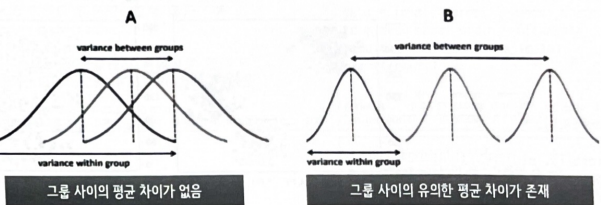

##2.ANOVA의 종류

* ANOVA 방법
  * 일원분산분석(One-Way ANOVA)
    * 범주형 독립 변수가 한 개인 경우 사용
    * ex) 계절별 아이스크림 판매량 평균이 동일하다
  * 이원분산분석(Two-Way ANOVA)
    * 범주형 독립 변수가 두 개인 경우 사용 (K-Way ANOVA 범주형 변수가 K개인 경우)
    * 각 변수의 주효과 및 두 변수의 상호적용효과를 분석함 (주효과 : 각 변수로 일원분산분석한 결과)
    * 귀무가설,대립가설이 3세트
    * ex) 날씨 및 계절의 아이스크림 판매량에 대한 각각의 영향도와 상호작용을 확인한다.
    ( 두 요인이 연속형 종속변수에 영향을 주는지 안 주는지 분석하는것)
    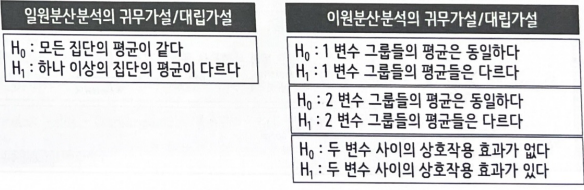

##3.분산의 중요성


* 동일 평균, 다른 분산의 예시
  * 평균값은 동일하지만 분산 값이 다름으로 인해 전체적인 데이터의 모습이 완전히 달라 보임
  * 분산이 클 수록 집단의 평균값 차이가 무의미해짐
  * 집단 간 평균값의 분산이 클수록, 집단내 분산이 작아질 수록 평균의 차이가 분명해짐
  

In [1]:
from scipy.stats import norm
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

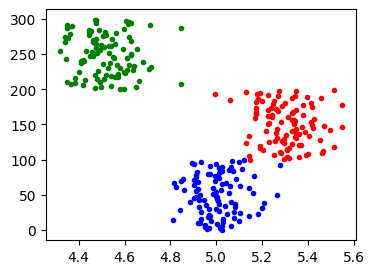

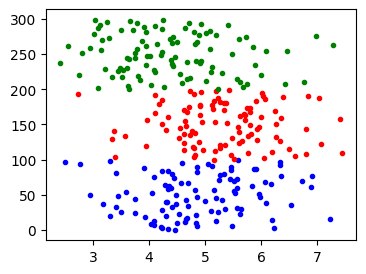

In [2]:
def draw_graph(std):
    centers = [5, 5.3, 4.5]
    colors = 'brg'
    size = 100
    plt.figure(figsize=(4, 3))
    for i in range(3):
        x = norm(centers[i], std).rvs(size)
        y = np.arange(size) + i * size
        plt.plot(x, y, '.', color=colors[i])
    plt.show()

# 함수 호출
draw_graph(std=0.1)
draw_graph(std=1)

##4.One-way ANOVA 분석 분석표

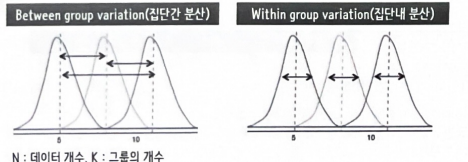
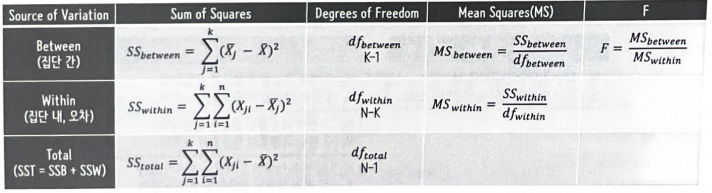

##5.One-way ANOVA 예


* 붓꽃 데이터 사용
  * 붓꽃 데이터(bigdata/iris_data.csv)를 사용하여 붓꽃의 품종(setosa,versicolor,virginica)별 꽃잎 너비(sepal_widteh)가 차이가 있다고 할 수 있는지 유의수준 0.05하에서 검증하라 품종(target) = 0:setosa,1:versicolor,2:virginica

In [3]:
from sklearn.datasets import load_iris
import pandas as pd

# Iris 데이터 불러오기
iris = load_iris()

# 데이터프레임으로 변환
data = pd.DataFrame(iris.data, columns=iris.feature_names)

# 품종(target) 추가
data['target'] = iris.target

# 컬럼 이름 정리 (공백 제거 및 단순화)
data.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'target']

# 데이터 확인
print(data.head())


   sepal_length  sepal_width  petal_length  petal_width  target
0           5.1          3.5           1.4          0.2       0
1           4.9          3.0           1.4          0.2       0
2           4.7          3.2           1.3          0.2       0
3           4.6          3.1           1.5          0.2       0
4           5.0          3.6           1.4          0.2       0


In [6]:
#[일원석분석] -1

from scipy.stats import f_oneway

# 각 품종별 꽃잎 너비 추출
setosa = data.loc[data['target'] == 0, 'sepal_width']
versicolor = data.loc[data['target'] == 1, 'sepal_width']
virginica = data.loc[data['target'] == 2, 'sepal_width']

# 일원분산분석(ANOVA) 수행
statistic, pvalue = f_oneway(setosa, versicolor, virginica)

# 결과 출력
print(f'ANOVA / F-statistic: {statistic:.1f}, p-value: {pvalue:.4f}')
if pvalue < 0.05:
    print("세 품종 간 꽃잎 너비에 유의미한 차이가 있습니다.")
else:
    print("세 품종 간 꽃잎 너비에 유의미한 차이가 없습니다.")


ANOVA / F-statistic: 49.2, p-value: 0.0000
세 품종 간 꽃잎 너비에 유의미한 차이가 있습니다.


In [21]:
#[일원석분석] -2
import statsmodels.api as sm
from statsmodels.formula.api import ols

data = data[['target','sepal_width']]
lm = ols('sepal_width ~ C(target)', data=data).fit()
result = sm.stats.anova_lm(lm)
print(result)

              df     sum_sq   mean_sq         F        PR(>F)
C(target)    2.0  11.344933  5.672467  49.16004  4.492017e-17
Residual   147.0  16.962000  0.115388       NaN           NaN


##6.One-way ANOVA 함수


* ANOVA 함수
* scipy.stats
  * from scipy.stats import f_oneway -> F-statistic,p-value
  * f_oneway(*sample)
* statsmodels.api.stats
  * import statsmodels.api as sm
  * from statsmodels.formula.api import ols
  * sm.stats.anova_lm(선형모델) -> 분산분석표 DataFrame
  * ols(formula,data).fit() -> 선형모델

* ols(ordinary least squqres) 모델
  * 오차의 제곱의 합이 최소가 되는 해를 구하는 방법을 사용하는 선형 모델
  ols('sepal_width ~ C(target)'.data).fit()

* ANOVA를 위한 formula
  * 'value ~ C(treatment)':'종속변수~C(독립변수)'
    * value : 종속변수
    * treatment : 범주형(C)인 독립변수
    

##7.폼종별 sepal_width의 평균에 차이가 있는지 검정

In [45]:
#[1] 데이터 가져오기
!git clone https://github.com/HyeonSu-Kang/bigdata
import pandas as pd

iris = pd.read_csv('bigdata/iris_data.csv')
iris.columns = ['sepal_length','sepal_width','petal_length','petal_width','target']
print(iris.head())

fatal: destination path 'bigdata' already exists and is not an empty directory.
   sepal_length  sepal_width  petal_length  petal_width  target
0           5.1          3.5           1.4          0.2       0
1           4.9          3.0           1.4          0.2       0
2           4.7          3.2           1.3          0.2       0
3           4.6          3.1           1.5          0.2       0
4           5.0          3.6           1.4          0.2       0


In [47]:
#[2-1] 폼종별 각 변수의 평균 확인
iris.groupby('target').mean()

,sepal_length,sepal_width,petal_length,petal_width
target,,,,
0,5.006,3.428,1.462,0.246
1,5.936,2.770,4.260,1.326
2,6.588,2.974,5.552,2.026


In [54]:
#[2-2] 특정 변수에 대한 폼종별 평균 확인
iris.groupby('target')['sepal_width'].mean()

,sepal_width
target,
0,3.428
1,2.770
2,2.974


In [56]:
# group 0,1,2 평균의 차이가 있음
# 평균값의 차이가 실제로 의미가 있는 차이인지 알고 싶다면
# 분산 분석을 통해 통계적으로 유의성을 알아 볼 수 있음

In [57]:
for x in iris.groupby('target')['sepal_width']:
  print(x[0],x[1].values)

0 [3.5 3.  3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 3.7 3.4 3.  3.  4.  4.4 3.9 3.5
 3.8 3.8 3.4 3.7 3.6 3.3 3.4 3.  3.4 3.5 3.4 3.2 3.1 3.4 4.1 4.2 3.1 3.2
 3.5 3.6 3.  3.4 3.5 2.3 3.2 3.5 3.8 3.  3.8 3.2 3.7 3.3]
1 [3.2 3.2 3.1 2.3 2.8 2.8 3.3 2.4 2.9 2.7 2.  3.  2.2 2.9 2.9 3.1 3.  2.7
 2.2 2.5 3.2 2.8 2.5 2.8 2.9 3.  2.8 3.  2.9 2.6 2.4 2.4 2.7 2.7 3.  3.4
 3.1 2.3 3.  2.5 2.6 3.  2.6 2.3 2.7 3.  2.9 2.9 2.5 2.8]
2 [3.3 2.7 3.  2.9 3.  3.  2.5 2.9 2.5 3.6 3.2 2.7 3.  2.5 2.8 3.2 3.  3.8
 2.6 2.2 3.2 2.8 2.8 2.7 3.3 3.2 2.8 3.  2.8 3.  2.8 3.8 2.8 2.8 2.6 3.
 3.4 3.1 3.  3.1 3.1 3.1 2.7 3.2 3.3 3.  2.5 3.  3.4 3. ]


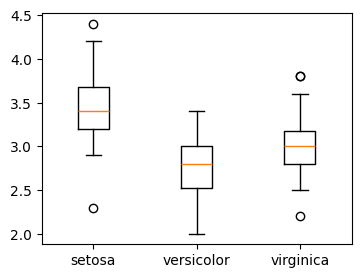

In [69]:
#[3] 그룹 추출 및 그래프로 확인
import matplotlib.pyplot as plt

data = [x[1].values for x in iris.groupby('target')['sepal_width']]

plt.figure(figsize=(4,3))
plt.boxplot(data,labels=['setosa','versicolor','virginica'])
plt.show()

In [95]:
#[4] 정규성 확인
# p-value가 0.05보다 큰 값일 때 정규성을 갖음

from scipy.stats import shapiro
data = [x[1].values for x in iris.groupby('target')['sepal_width']]
_,pvalue0 = shapiro(data[0])
_,pvalue1 = shapiro(data[1])
_,pvlaue2 = shapiro(data[2])
print(f' pvalue의 값 : {pvalue0:.4f} {pvalue1:.04f} {pvlaue2:.04f}')

 pvalue의 값 : 0.2715 0.3380 0.1809


In [98]:
#[5] 등분산성 확인
from scipy.stats import bartlett
_,pvalue = bartlett(*data)
print(f'{pvalue:.4f}')

0.3515


In [101]:
#[6] 일원분산분석-1
from scipy.stats import f_oneway
statistic,pvalue = f_oneway(*data)

print(f'데이터의 일원분산분석 결과 :\
F = {statistic:.4f}, p-value = {pvalue:.5f}')

if pvalue < 0.05:
  print('P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미한 차이가 있음')

데이터의 일원분산분석 결과 :F = 49.1600, p-value = 0.00000
P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미한 차이가 있음


In [109]:
#[7] 일원분산분석 - 2
import statsmodels.api as sm
from statsmodels.formula.api import ols

data = iris[['target','sepal_width']]
lm = ols('sepal_width ~ C(target)',data).fit()
result = sm.stats.anova_lm(lm)
print(result)

              df     sum_sq   mean_sq         F        PR(>F)
C(target)    2.0  11.344933  5.672467  49.16004  4.492017e-17
Residual   147.0  16.962000  0.115388       NaN           NaN


In [ ]:
# C(target) 의 P-value(PR) 값이 0.05 보다 작으므로 그룹의
# 평균값이 통계적으로 유의미하게 차이가 있음

# 구체적으로 어쩐 집단이 차이가 있는지 확인하려면
# 사후분석를 해야함
# 유의미한 차이가 없는 경우는 사후분석할 필요가 없음